# Import basic library

In [1]:
import pandas as pd
import numpy as np
from nltk.stem import StemmerI
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import nltk
# nltk.download('stopwords')
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier


https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

# About dataset 

As social media usage becomes increasingly prevalent in every age group, a vast majority of citizens rely on this essential medium for day-to-day communication. Social media’s ubiquity means that cyberbullying can effectively impact anyone at any time or anywhere, and the relative anonymity
of the internet makes such personal attacks more difficult to stop than traditional bullying.

On April 15th, 2020, UNICEF issued a warning in response to the increased risk of cyberbullying during the COVID-19 pandemic due to widespread school closures, increased screen time, and decreased face-to-face social interaction. The statistics of cyberbullying are outright alarming: 36.5% of middle and high school students have felt cyberbullied and 87% have observed cyberbullying, with effects ranging from decreased academic performance to depression to suicidal thoughts.

In light of all of this, this dataset contains more than 47000 tweets labelled according to the class of cyberbullying:

Age;
Ethnicity;
Gender;
Religion;
Other type of cyberbullying;
Not cyberbullying



Data Dictionary :
tweet_text: Tweets regsitred 
cyberbullying_type: type of cyber bullying.

# Load Dataset 

In [2]:
cbt = pd.read_csv("cyberbullying_tweets.csv")

In [3]:
cbt.shape

(47692, 2)

# Checking for data balanced 

In [4]:
cbt['cyberbullying_type'].value_counts(normalize='True')*100

religion               16.770108
age                    16.757527
gender                 16.717689
ethnicity              16.692527
not_cyberbullying      16.658978
other_cyberbullying    16.403170
Name: cyberbullying_type, dtype: float64

In [5]:
cbt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


# Checking Null values 

In [6]:
cbt.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [7]:
cbt.tweet_text

0        In other words #katandandre, your food was cra...
1        Why is #aussietv so white? #MKR #theblock #ImA...
2        @XochitlSuckkks a classy whore? Or more red ve...
3        @Jason_Gio meh. :P  thanks for the heads up, b...
4        @RudhoeEnglish This is an ISIS account pretend...
                               ...                        
47687    Black ppl aren't expected to do anything, depe...
47688    Turner did not withhold his disappointment. Tu...
47689    I swear to God. This dumb nigger bitch. I have...
47690    Yea fuck you RT @therealexel: IF YOURE A NIGGE...
47691    Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...
Name: tweet_text, Length: 47692, dtype: object

# Removing stopwords and unwanted characters ,Convert text to lowercase,Remove unwanted spaces.

In [8]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Remove unwanted characters using regex
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove unwanted spaces
    text = text.strip()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join the filtered tokens back into a sentence
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

nltk.download('punkt')

In [9]:

import nltk


# Adding processed_text

In [10]:
cbt['processed_text']=cbt.tweet_text.apply(preprocess_text)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [12]:
cbt.processed_text

0                  words katandandre food crapilicious mkr
1        aussietv white mkr theblock imacelebrityau tod...
2          xochitlsuckkks classy whore red velvet cupcakes
3        jason_gio meh p thanks heads concerned another...
4        rudhoeenglish isis account pretending kurdish ...
                               ...                        
47687    black ppl arent expected anything depended any...
47688    turner withhold disappointment turner called c...
47689    swear god dumb nigger bitch got bleach hair re...
47690    yea fuck rt therealexel youre nigger fucking u...
47691    bro u got ta chill rt chillshrammy dog fuck kp...
Name: processed_text, Length: 47692, dtype: object

In [13]:
from wordcloud import WordCloud

In [14]:
cbt[cbt['cyberbullying_type']=='age']

,tweet_text,cyberbullying_type,processed_text
31739,Here at home. Neighbors pick on my family and ...,age,home neighbors pick family mind son autistic f...
31740,Being bullied at school: High-achieving boys u...,age,bullied school highachieving boys use strategi...
31741,There was a girl in my class in 6th grade who ...,age,girl class 6th grade little autistic parents t...
31742,He’s probably a white gay kid from some suburb...,age,hes probably white gay kid suburb dont want sh...
31743,You are pushed ti resorting. Treating thr bull...,age,pushed ti resorting treating thr bullies perce...
...,...,...,...
39726,This girl really tried to say I bullied her in...,age,girl really tried say bullied high school real...
39727,a bully at school who has been messing with me...,age,bully school messing since 3rd grade lt3
39728,I remember I wrote an entire song in 6th grade...,age,remember wrote entire song 6th grade called bo...
39729,I was not the Prom Queen. I was the bullied gi...,age,prom queen bullied girl black sheep different ...


In [15]:
cbt[cbt['cyberbullying_type']=='religion']

,tweet_text,cyberbullying_type,processed_text
15918,"Sudeep, did she invite him though? No right? W...",religion,sudeep invite though right getting worded your...
15919,@discerningmumin Islam has never been a resist...,religion,discerningmumin islam never resistance oppress...
15920,"Boy, your comment about Journalists wanting to...",religion,boy comment journalists wanting keep churches ...
15921,@ShashiTharoor @INCIndia Hindus were and are g...,religion,shashitharoor incindia hindus getting killed m...
15922,White supremicists? How many do you know? Ther...,religion,white supremicists many know idiots races anti...
...,...,...,...
23911,Can you imagine if Christians came together li...,religion,imagine christians came together like 5 times ...
23912,So how to support justice from the initial pro...,religion,support justice initial problem morphed became...
23913,RT @TRobinsonNewEra: If you harbour any doubts...,religion,rt trobinsonnewera harbour doubts muslims beli...
23914,@dankmtl @PeaceNotHate_ One thing about Muslim...,religion,dankmtl peacenothate_ one thing muslims want e...


# Dropping tweet_text i.e. actual text

In [16]:
cbt.drop("tweet_text",axis=1,inplace=True)

# Since I am proceeding with binaruy classification so converting it into 2 categories cyberbully(1) and not cyberbullying (0)

In [17]:
cbt.cyberbullying_type.value_counts(normalize=True)

religion               0.167701
age                    0.167575
gender                 0.167177
ethnicity              0.166925
not_cyberbullying      0.166590
other_cyberbullying    0.164032
Name: cyberbullying_type, dtype: float64

In [18]:
cbt['cyberbullying_type']=cbt['cyberbullying_type'].apply(lambda x:0 if x=='not_cyberbullying' else 1 )

# Checking data is balanced 

In [19]:
cbt.cyberbullying_type.value_counts(normalize=True)*100

1    83.341022
0    16.658978
Name: cyberbullying_type, dtype: float64

In [20]:
from nltk.stem import PorterStemmer

In [21]:
pstem = PorterStemmer()

!pip install wordcloud

In [22]:
wc= WordCloud()

In [23]:
wc.generate(str(cbt.processed_text))

# Creating plot of words 

In [24]:
import matplotlib.pyplot as plt

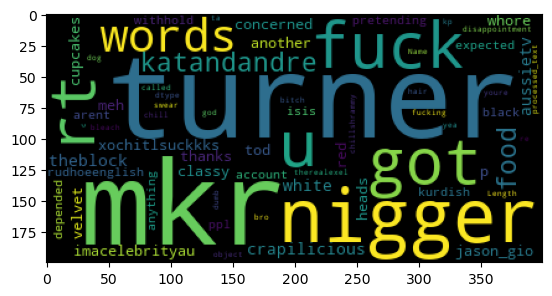

In [25]:
plt.imshow(wc) # Most frequent words in the dataset 

In [26]:
pstem.stem(cbt.processed_text[5])

'raja5aab quickieleaks yes test god good bad indifferent weird whatever proves gods exist'

!pip install textblob

In [27]:
from textblob import TextBlob

# Creating function for lemmatization and convert the text and lemmatized text to the dataframe 

In [28]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
#nltk.download('punkt')
#nltk.download('wordnet')



# Function to perform lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word, wordnet.VERB) for word in tokens])
    return lemmatized_text

# Apply lemmatization to the 'text' column and store the result in a new column 'lemmatized_text'
cbt['lemmatized_text'] = cbt['processed_text'].apply(lemmatize_text)

# Display the DataFrame with the lemmatized text
cbt


,cyberbullying_type,processed_text,lemmatized_text
0,0,words katandandre food crapilicious mkr,word katandandre food crapilicious mkr
1,0,aussietv white mkr theblock imacelebrityau tod...,aussietv white mkr theblock imacelebrityau tod...
2,0,xochitlsuckkks classy whore red velvet cupcakes,xochitlsuckkks classy whore red velvet cupcakes
3,0,jason_gio meh p thanks heads concerned another...,jason_gio meh p thank head concern another ang...
4,0,rudhoeenglish isis account pretending kurdish ...,rudhoeenglish isis account pretend kurdish acc...
...,...,...,...
47687,1,black ppl arent expected anything depended any...,black ppl arent expect anything depend anythin...
47688,1,turner withhold disappointment turner called c...,turner withhold disappointment turner call cou...
47689,1,swear god dumb nigger bitch got bleach hair re...,swear god dumb nigger bitch get bleach hair re...
47690,1,yea fuck rt therealexel youre nigger fucking u...,yea fuck rt therealexel youre nigger fuck unfo...


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,train_test_split

# Dropping the text column

In [30]:
cbt.drop("processed_text",axis=1,inplace=True)

# Splitting it into x, y variables 

In [31]:
x= cbt.lemmatized_text
y=cbt.cyberbullying_type

In [32]:
import scipy.stats as stats

In [33]:
xtrain , xtest, ytrain , ytest = train_test_split(x,y, test_size=0.3 , stratify=y,random_state=30)

# Tranforming the text into 0 and 1 

In [34]:
tf_idf=TfidfVectorizer()

In [35]:
xtrain_tf=tf_idf.fit_transform(xtrain)
xtest_tf=tf_idf.transform(xtest)

# 48199 are features are formed 

In [36]:
len(xtrain_tf.toarray()[0])

48199

In [37]:
len(tf_idf.get_feature_names_out())

48199

# Creating dataframe for train and test

In [38]:
train = pd.DataFrame(xtrain_tf.toarray(),columns=tf_idf.get_feature_names_out())

In [39]:
train.head()

,00,000,0006,0021,007,007alisohrab,007luis,00s,00simmerforlife,01,...,𝔂𝓸𝓾,𝕕𝕖𝕦𝕥𝕔𝕙,𝕙𝕒𝕣𝕣𝕚𝕤𝕠𝕟,𝕠𝕘,𝕣𝕠𝕟𝕟𝕚𝕖,𝕥𝕙𝕖,𝕧𝕖𝕣𝕠𝕟𝕚𝕔𝕒,𝕫𝕠𝕖𝕪,𝚎𝚕𝚞𝚜𝚒𝚟𝚎,𝟧𝟪
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
train

,00,000,0006,0021,007,007alisohrab,007luis,00s,00simmerforlife,01,...,𝔂𝓸𝓾,𝕕𝕖𝕦𝕥𝕔𝕙,𝕙𝕒𝕣𝕣𝕚𝕤𝕠𝕟,𝕠𝕘,𝕣𝕠𝕟𝕟𝕚𝕖,𝕥𝕙𝕖,𝕧𝕖𝕣𝕠𝕟𝕚𝕔𝕒,𝕫𝕠𝕖𝕪,𝚎𝚕𝚞𝚜𝚒𝚟𝚎,𝟧𝟪
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
test = pd.DataFrame(xtest_tf.toarray(),columns=tf_idf.get_feature_names_out())

In [42]:
test

,00,000,0006,0021,007,007alisohrab,007luis,00s,00simmerforlife,01,...,𝔂𝓸𝓾,𝕕𝕖𝕦𝕥𝕔𝕙,𝕙𝕒𝕣𝕣𝕚𝕤𝕠𝕟,𝕠𝕘,𝕣𝕠𝕟𝕟𝕚𝕖,𝕥𝕙𝕖,𝕧𝕖𝕣𝕠𝕟𝕚𝕔𝕒,𝕫𝕠𝕖𝕪,𝚎𝚕𝚞𝚜𝚒𝚟𝚎,𝟧𝟪
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Building models 

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
base_lr= LogisticRegression()

In [45]:
base_lr.fit(train,ytrain)

LogisticRegression()

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print('                classification report of logisitc model in train dataset is:')
print(classification_report(ytrain,base_lr.predict(train)),end=' ')

                classification report of logisitc model in train dataset is:
              precision    recall  f1-score   support

           0       0.89      0.46      0.61      5561
           1       0.90      0.99      0.94     27823

    accuracy                           0.90     33384
   macro avg       0.90      0.72      0.77     33384
weighted avg       0.90      0.90      0.89     33384
 

In [48]:
print('                classification report of logisitc model in test dataset:')
print(classification_report(ytest,base_lr.predict(xtest_tf)),end=' ')

                classification report of logisitc model in test dataset:
              precision    recall  f1-score   support

           0       0.74      0.34      0.47      2384
           1       0.88      0.98      0.93     11924

    accuracy                           0.87     14308
   macro avg       0.81      0.66      0.70     14308
weighted avg       0.86      0.87      0.85     14308
 

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
from sklearn.metrics import accuracy_score

In [50]:
performance = pd.DataFrame({'Model':['Logistic Reg'],'Train_acc':[accuracy_score(ytrain,base_lr.predict(xtrain_tf))]
                           , 'Test_acc':[accuracy_score(ytest,base_lr.predict(xtest_tf))]
                           
                           
                           
                          ,'parameters':['default'], 'Remarks':['The difference between train and test is 0.03 within level of significance ']  })

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [51]:
performance

,Model,Train_acc,Test_acc,parameters,Remarks
0,Logistic Reg,0.900731,0.870772,default,The difference between train and test is 0.03 ...


In [52]:
x

0                   word katandandre food crapilicious mkr
1        aussietv white mkr theblock imacelebrityau tod...
2          xochitlsuckkks classy whore red velvet cupcakes
3        jason_gio meh p thank head concern another ang...
4        rudhoeenglish isis account pretend kurdish acc...
                               ...                        
47687    black ppl arent expect anything depend anythin...
47688    turner withhold disappointment turner call cou...
47689    swear god dumb nigger bitch get bleach hair re...
47690    yea fuck rt therealexel youre nigger fuck unfo...
47691    bro u get ta chill rt chillshrammy dog fuck kp...
Name: lemmatized_text, Length: 47692, dtype: object

In [53]:
r= RandomForestClassifier()

In [54]:
r.fit(train,ytrain)

RandomForestClassifier()

In [55]:
import seaborn as sns


In [56]:
print('                classification report of Random forest model in train dataset is:')
print(classification_report(ytrain,r.predict(train)),end=' ')

print('                classification report of Random forest in test dataset:')
print(classification_report(ytest,r.predict(xtest_tf)),end=' ')

                classification report of Random forest model in train dataset is:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      5561
           1       0.98      0.99      0.99     27823

    accuracy                           0.98     33384
   macro avg       0.97      0.95      0.96     33384
weighted avg       0.98      0.98      0.98     33384
                 classification report of Random forest in test dataset:


C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.60      0.39      0.47      2384
           1       0.89      0.95      0.92     11924

    accuracy                           0.86     14308
   macro avg       0.74      0.67      0.69     14308
weighted avg       0.84      0.86      0.84     14308
 

In [57]:
t= pd.DataFrame(r.feature_importances_,index=r.feature_names_in_,columns=['Feature_imp'])

In [58]:
t.sort_values(by='Feature_imp',ascending=False)

,Feature_imp
mkr,0.033350
school,0.014630
bully,0.012085
fuck,0.010884
dumb,0.010474
...,...
profamily,0.000000
profane,0.000000
empresssudol,0.000000
empkamikaze,0.000000


In [59]:
performance = pd.concat([performance, pd.DataFrame({'Model':['Random forest'],'Train_acc':[accuracy_score(ytrain,r.predict(xtrain_tf))]
                           , 'Test_acc':[accuracy_score(ytest,r.predict(xtest_tf))]
                           
                           
                           
                          ,'parameters':['default'], 'Remarks':['The difference between train and test is 0.12 which is not within level of significance ']  })])

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
performance

,Model,Train_acc,Test_acc,parameters,Remarks
0,Logistic Reg,0.900731,0.870772,default,The difference between train and test is 0.03 ...
0,Random forest,0.977414,0.855116,default,The difference between train and test is 0.12 ...


In [61]:
performance

,Model,Train_acc,Test_acc,parameters,Remarks
0,Logistic Reg,0.900731,0.870772,default,The difference between train and test is 0.03 ...
0,Random forest,0.977414,0.855116,default,The difference between train and test is 0.12 ...


In [62]:
r2= RandomForestClassifier(n_estimators=120,n_jobs=-1, criterion='gini',
    max_depth=4,
    min_samples_split=6,
    min_samples_leaf=5,

    max_features='log2',)

r2.fit(train,ytrain)

import seaborn as sns


print('                classification report of Random forest model in train dataset is:')
print(classification_report(ytrain,r2.predict(train)),end=' ')

print('                classification report of Random forest in test dataset:')
print(classification_report(ytest,r2.predict(xtest_tf)),end=' ')

                classification report of Random forest model in train dataset is:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5561
           1       0.83      1.00      0.91     27823

    accuracy                           0.83     33384
   macro avg       0.42      0.50      0.45     33384
weighted avg       0.69      0.83      0.76     33384
                 classification report of Random forest in test dataset:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2384
           1       0.83      1.00      0.91     11924

    accuracy                           0.83     14308
   macro avg       0.42      0.50      0.45     14308
weighted avg       0.69      0.83      0.76     14308
 

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base

In [63]:
performance = pd.concat([performance, pd.DataFrame({'Model':['Random forest 2'],'Train_acc':[accuracy_score(ytrain,r2.predict(xtrain_tf))]
                           , 'Test_acc':[accuracy_score(ytest,r2.predict(xtest_tf))]
                           
                           
                           
                          ,'parameters':['n_estimators=120,n_jobs=-1, criterion=gini ,max_depth=4,min_samples_split=6,min_samples_leaf=5,max_features=log2'], 'Remarks':['The model is not able to identify class 0 ']  })])

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [64]:
performance

,Model,Train_acc,Test_acc,parameters,Remarks
0,Logistic Reg,0.900731,0.870772,default,The difference between train and test is 0.03 ...
0,Random forest,0.977414,0.855116,default,The difference between train and test is 0.12 ...
0,Random forest 2,0.833423,0.833380,"n_estimators=120,n_jobs=-1, criterion=gini ,ma...",The model is not able to identify class 0


In [65]:
r3= RandomForestClassifier(n_estimators=50,n_jobs=-1, criterion='gini',
    max_depth=3,
    min_samples_split=3,
    min_samples_leaf=5,

    max_features='sqrt',)

r3.fit(train,ytrain)

import seaborn as sns


print('                classification report of Random forest model in train dataset is:')
print(classification_report(ytrain,r3.predict(train)),end=' ')

print('                classification report of Random forest in test dataset:')
print(classification_report(ytest,r3.predict(xtest_tf)),end=' ')

                classification report of Random forest model in train dataset is:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5561
           1       0.83      1.00      0.91     27823

    accuracy                           0.83     33384
   macro avg       0.42      0.50      0.45     33384
weighted avg       0.69      0.83      0.76     33384
                 classification report of Random forest in test dataset:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2384
           1       0.83      1.00      0.91     11924

    accuracy                           0.83     14308
   macro avg       0.42      0.50      0.45     14308
weighted avg       0.69      0.83      0.76     14308
 

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base

In [66]:
performance = pd.concat([performance, pd.DataFrame({'Model':['Random forest 3'],'Train_acc':[accuracy_score(ytrain,r3.predict(xtrain_tf))]
                           , 'Test_acc':[accuracy_score(ytest,r3.predict(xtest_tf))]
                           
                           
                           
                          ,'parameters':['n_estimators=50,n_jobs=-1, criterion=gini ,max_depth=3,min_samples_split=3,min_samples_leaf=5,max_features=sqrt'], 'Remarks':['The model is not able to identify class 0 ']  })])

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
r4= RandomForestClassifier(n_estimators=110,n_jobs=-1, criterion='gini',
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=2,

    max_features='sqrt',)

r4.fit(train,ytrain)

import seaborn as sns


print('                classification report of Random forest model in train dataset is:')
print(classification_report(ytrain,r4.predict(train)),end=' ')

print('                classification report of Random forest in test dataset:')
print(classification_report(ytest,r4.predict(xtest_tf)),end=' ')

                classification report of Random forest model in train dataset is:


C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5561
           1       0.83      1.00      0.91     27823

    accuracy                           0.83     33384
   macro avg       0.42      0.50      0.45     33384
weighted avg       0.69      0.83      0.76     33384
                 classification report of Random forest in test dataset:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2384
           1       0.83      1.00      0.91     11924

    accuracy                           0.83     14308
   macro avg       0.42      0.50      0.45     14308
weighted avg       0.69      0.83      0.76     14308
 

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
performance = pd.concat([performance, pd.DataFrame({'Model':['Random forest 4'],'Train_acc':[accuracy_score(ytrain,r4.predict(xtrain_tf))]
                           , 'Test_acc':[accuracy_score(ytest,r4.predict(xtest_tf))]
                           
                           
                           
                          ,'parameters':['n_estimators=110,n_jobs=-1, criterion=gini ,max_depth=2,min_samples_split=2,min_samples_leaf=2,max_features=sqrt'], 'Remarks':['The model is not able to identify class 0 ']  })])

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [69]:
performance

,Model,Train_acc,Test_acc,parameters,Remarks
0,Logistic Reg,0.900731,0.870772,default,The difference between train and test is 0.03 ...
0,Random forest,0.977414,0.855116,default,The difference between train and test is 0.12 ...
0,Random forest 2,0.833423,0.833380,"n_estimators=120,n_jobs=-1, criterion=gini ,ma...",The model is not able to identify class 0
0,Random forest 3,0.833423,0.833380,"n_estimators=50,n_jobs=-1, criterion=gini ,max...",The model is not able to identify class 0
0,Random forest 4,0.833423,0.833380,"n_estimators=110,n_jobs=-1, criterion=gini ,ma...",The model is not able to identify class 0


In [70]:
xg= XGBClassifier()

xg.fit(train,ytrain)

import seaborn as sns


print('                classification report ofXGBClassifiert model in train dataset is:')
print(classification_report(ytrain,xg.predict(train)),end=' ')

print('                classification report of XGBClassifier in test dataset:')
print(classification_report(ytest,xg.predict(xtest_tf)),end=' ')

                classification report ofXGBClassifiert model in train dataset is:
              precision    recall  f1-score   support

           0       0.82      0.43      0.56      5561
           1       0.90      0.98      0.94     27823

    accuracy                           0.89     33384
   macro avg       0.86      0.71      0.75     33384
weighted avg       0.88      0.89      0.87     33384
                 classification report of XGBClassifier in test dataset:
              precision    recall  f1-score   support

           0       0.17      1.00      0.29      2384
           1       0.00      0.00      0.00     11924

    accuracy                           0.17     14308
   macro avg       0.08      0.50      0.14     14308
weighted avg       0.03      0.17      0.05     14308
 

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
performance = pd.concat([performance, pd.DataFrame({'Model':['XGB'],'Train_acc':[accuracy_score(ytrain,xg.predict(xtrain_tf))]
                           , 'Test_acc':[accuracy_score(ytest,xg.predict(xtest_tf))]
                           
                           
                           
                          ,'parameters':['default'], 'Remarks':['The model is not able to identify class 1 in test and accuracy in train test is low too  ']  })])

In [72]:
performance.set_index("Remarks")

,Model,Train_acc,Test_acc,parameters
Remarks,,,,
The difference between train and test is 0.03 within level of significance,Logistic Reg,0.900731,0.870772,default
The difference between train and test is 0.12 which is not within level of significance,Random forest,0.977414,0.855116,default
The model is not able to identify class 0,Random forest 2,0.833423,0.833380,"n_estimators=120,n_jobs=-1, criterion=gini ,ma..."
The model is not able to identify class 0,Random forest 3,0.833423,0.833380,"n_estimators=50,n_jobs=-1, criterion=gini ,max..."
The model is not able to identify class 0,Random forest 4,0.833423,0.833380,"n_estimators=110,n_jobs=-1, criterion=gini ,ma..."
The model is not able to identify class 1 in test and accuracy in train test is low too,XGB,0.166577,0.166620,default


In [73]:
ad= AdaBoostClassifier()

ad.fit(train,ytrain)

import seaborn as sns


print('                classification report of Adaboost model in train dataset is:')
print(classification_report(ytrain,ad.predict(train)),end=' ')

print('                classification report of Adaboost in test dataset:')
print(classification_report(ytest,ad.predict(xtest_tf)),end=' ')

                classification report of Adaboost model in train dataset is:
              precision    recall  f1-score   support

           0       0.71      0.23      0.35      5561
           1       0.86      0.98      0.92     27823

    accuracy                           0.86     33384
   macro avg       0.79      0.61      0.63     33384
weighted avg       0.84      0.86      0.82     33384
                 classification report of Adaboost in test dataset:


C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.72      0.24      0.36      2384
           1       0.87      0.98      0.92     11924

    accuracy                           0.86     14308
   macro avg       0.80      0.61      0.64     14308
weighted avg       0.84      0.86      0.83     14308
 

In [74]:
performance = pd.concat([performance, pd.DataFrame({'Model':['Adaboost'],'Train_acc':[accuracy_score(ytrain,ad.predict(xtrain_tf))]
                           , 'Test_acc':[accuracy_score(ytest,ad.predict(xtest_tf))]
                           
                           
                           
                          ,'parameters':['default'], 'Remarks':['The differnce between train and test is within level of sgnificance  ']  })])

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [75]:
performance.reset_index(inplace=True)

In [76]:
performance.drop('index',axis=1,inplace=True)

In [77]:
performance.sort_values(by='Test_acc',ascending=False).set_index('Remarks')

,Model,Train_acc,Test_acc,parameters
Remarks,,,,
The difference between train and test is 0.03 within level of significance,Logistic Reg,0.900731,0.870772,default
The differnce between train and test is within level of sgnificance,Adaboost,0.856009,0.858261,default
The difference between train and test is 0.12 which is not within level of significance,Random forest,0.977414,0.855116,default
The model is not able to identify class 0,Random forest 2,0.833423,0.833380,"n_estimators=120,n_jobs=-1, criterion=gini ,ma..."
The model is not able to identify class 0,Random forest 3,0.833423,0.833380,"n_estimators=50,n_jobs=-1, criterion=gini ,max..."
The model is not able to identify class 0,Random forest 4,0.833423,0.833380,"n_estimators=110,n_jobs=-1, criterion=gini ,ma..."
The model is not able to identify class 1 in test and accuracy in train test is low too,XGB,0.166577,0.166620,default


In [78]:
feature_imp = pd.DataFrame(base_lr.coef_.T,index=base_lr.feature_names_in_,columns=['Coefficient of logrithmic equation'])

In [79]:
feature_imp.sort_values(by='Coefficient of logrithmic equation', ascending=False).head(13)

,Coefficient of logrithmic equation
dumb,7.145504
rape,6.587919
nigger,6.365963
muslims,6.311047
high,6.213606
joke,6.097922
idiot,5.709589
bitch,5.443509
feminazi,5.395302
fuck,5.302536


In [80]:
feature_imp.sort_values(by='Coefficient of logrithmic equation', ascending=False).tail(14)

,Coefficient of logrithmic equation
bull,-2.003230
classic,-2.014792
yesallwomen,-2.366643
lifeinkhilafah,-2.367344
isso,-2.459580
mosul,-2.516436
beatdown,-2.613371
college,-2.890191
daesh,-3.215038
que,-3.226076


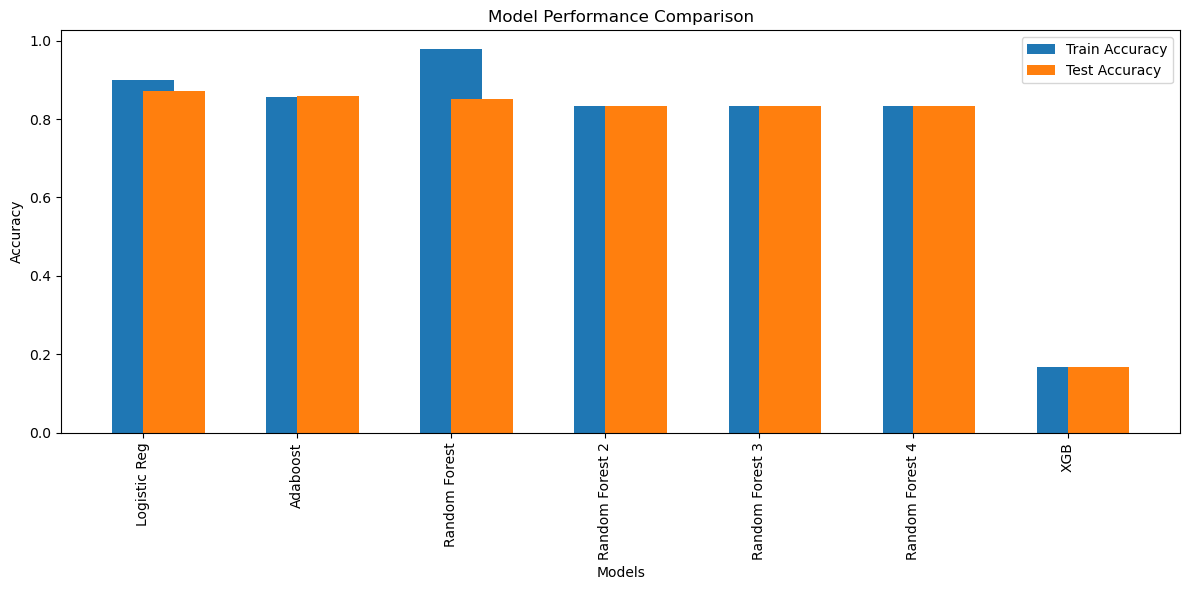

In [81]:
import matplotlib.pyplot as plt

# Model performance data
models = ['Logistic Reg', 'Adaboost', 'Random Forest', 'Random Forest 2', 'Random Forest 3', 'Random Forest 4', 'XGB']
train_acc = [0.900731, 0.856009, 0.977444, 0.833423, 0.833423, 0.833423, 0.166577]
test_acc = [0.870772, 0.858261, 0.851901, 0.833380, 0.833380, 0.833380, 0.166620]

x = range(len(models))

plt.figure(figsize=(12, 6))
plt.bar(x, train_acc, width=0.4, label='Train Accuracy', align='center')
plt.bar(x, test_acc, width=0.4, label='Test Accuracy', align='edge')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, models, rotation='vertical')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


# Logistic Regression is the better model overall because it:

1. Achieves higher overall accuracy.
2. Shows significantly better precision and F1-score for Class 0, which is important since Class 0 performance was a weakness for AdaBoost.
3. Maintains excellent performance for Class 1, similar to AdaBoost.
4. Has higher macro and weighted average scores, indicating better balanced and consistent performance across different metrics.